<a href="https://colab.research.google.com/github/Vagarh/MSC_Eafit/blob/main/EXAMEN_3_ALGEBRAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Sea A una matriz de tamaño m × n. Demuestre que A*A^t y A^t*A tienen los mismos valores propios.
# Ayuda: si x ∈ R^n es vector propio de A^t*A, entonces Ax ∈ R^m es vector propio de A*A^t.

In [10]:
import numpy as np

In [11]:
#alcula los valores propios de la matriz resultante de multiplicar A por su transpuesta At
def same_eigenvalues(A):
    At = np.transpose(A)
    ATA_eigenvalues = np.linalg.eigvals(np.dot(At, A))
    AAt_eigenvalues = np.linalg.eigvals(np.dot(A, At))

    return ATA_eigenvalues, AAt_eigenvalues

In [12]:


# Ejemplo de uso:
# Define una matriz A ( 3x2)
A = np.array([[6, 2],
              [4, 4]])

ATA_eigenvalues, AAt_eigenvalues = same_eigenvalues(A)

print("Valores propios de A*(A^t):", ATA_eigenvalues)
print("Valores propios de (A^t)*A:", AAt_eigenvalues)


Valores propios de A*(A^t): [68.24903099  3.75096901]
Valores propios de (A^t)*A: [68.24903099  3.75096901]


# 2. A Consiga un video corto (menos de 5 segundos de duración) con un escenario jo y un objeto moviendose. Extraiga 30 imágenes del video en escala de grises y resolución 400×600. Ponga las imágenes en una matriz H de tamaño 240000 × 30, es decir, cada imagen es una columna. Substraiga el promedio de las las a cada la de H , es decir, dena A = H − H ̄

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Abrir el video
video_path = '/content/drive/MyDrive/EAFIT/Algebra para ciencia de datos/video_preview_h264.mp4'  # Reemplaza con la ruta de tu video
cap = cv2.VideoCapture(video_path)

In [14]:
# Inicializar una matriz para almacenar las imágenes
H = np.zeros((240000, 30), dtype=np.uint8)

# Leer el video y extraer 30 imágenes
for i in range(30):
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir la imagen a escala de grises y cambiar la resolución
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray_frame, (400, 600))

    # Aplanar la imagen y agregarla a la matriz H
    H[:, i] = resized_frame.flatten()

# Liberar el objeto de captura de video
cap.release()


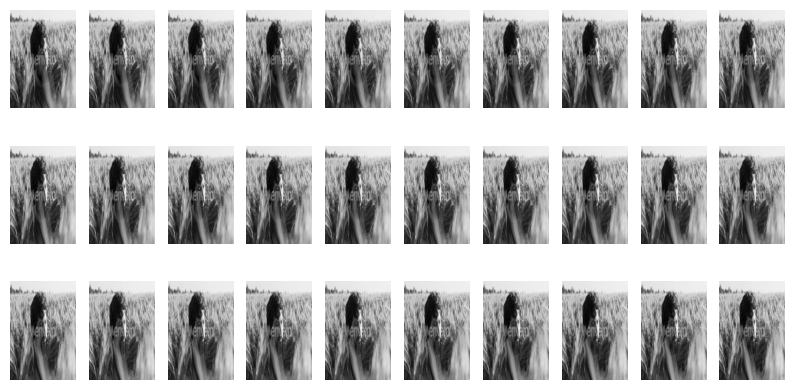

In [15]:

# Mostrar las imágenes
plt.figure(figsize=(10, 5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(H[:, i].reshape(600, 400), cmap='gray')
    plt.axis('off')

plt.show()


In [16]:
# Calcular el promedio de las columnas de H
H_promedio = np.mean(H, axis=1).reshape(-1, 1)

# Sustraer el promedio de las columnas
A = H - H_promedio


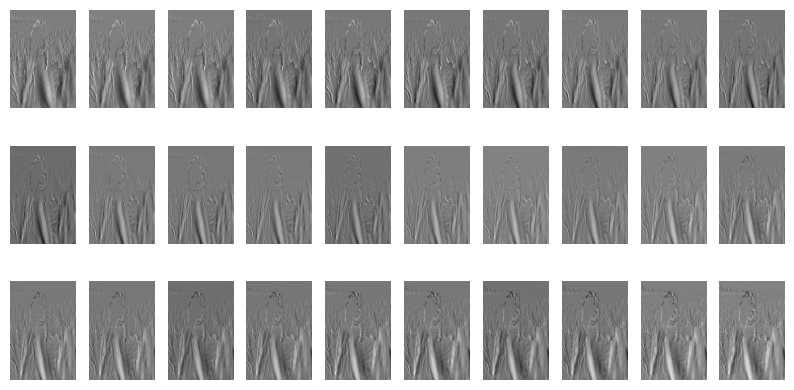

In [17]:
# Mostrar las imágenes de A
plt.figure(figsize=(10, 5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(A[:, i].reshape(600, 400), cmap='gray')
    plt.axis('off')

plt.show()

# 2. B Cálcule los valores propios mayor y menor de la matriz A*(A^t) y vectores propios asociados con dichos valores. Represente dichos vectores propios como imágenes en escala de grises y resolución 400 × 600.

In [18]:
import numpy as np

# Paso 1:
A = A = H - H_promedio

# Paso 2: Calcular la SVD reduccion de dimensionalidad
U, Sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Paso 3: Calcular los valores propios de A*(A^t)
eigenvalues_AAt = Sigma**2

# Paso 4: Encontrar el valor propio mayor y menor
lambda_max = np.max(eigenvalues_AAt)
lambda_min = np.min(eigenvalues_AAt)

print(f"El valor propio mayor es {lambda_max:.2f}")
print(f"El valor propio menor es {lambda_min:.2f}")


El valor propio mayor es 1200833121.89
El valor propio menor es 0.00


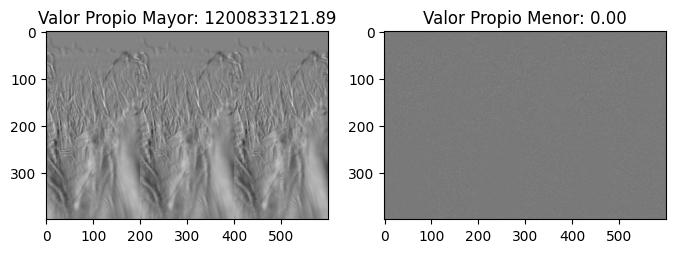

In [19]:

# Paso 5: Representar los vectores propios como imágenes
# Cambiar la forma de los vectores propios para que sean imágenes (400 × 600)
v_max_image = U[:, 0].reshape(400, 600)  # Vector propio asociado al mayor valor propio
v_min_image = U[:, -1].reshape(400, 600)  # Vector propio asociado al menor valor propio

# Paso 6: Visualizar las imágenes
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(v_max_image, cmap='gray')
plt.title(f'Valor Propio Mayor: {lambda_max:.2f}')

plt.subplot(1, 2, 2)
plt.imshow(v_min_image, cmap='gray')
plt.title(f'Valor Propio Menor: {lambda_min:.2f}')

plt.show()